# Unsupervised Learning
- Discovering the Hidden patterns from unlabeled data

# Supervised Learning
- Predict values that are known to techer
- *Aim:* Predict the target values of unseen data. given the features

## Types of Supervised Learning
- *Classification:* Target variable consist of categories. For example, we can predict whether a bank transaction is fraudulent or not. As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as binary classification.

- *Regression:* Regression is used to predict continuous values. For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

## Naming Conventions
- *Feature* = predictor variable = independent variable
- *Target Variable* = dependent variable = response variable

## Requirement of data
- No missing value
- Data numeric format
- Data stored in np array or pandas

### Perform EDA (Data analysis)
This requires some exploratory data analysis first to ensure data is in the correct format. Various pandas methods for descriptive statistics, along with appropriate data visualizations, are useful in this step.


# Classifying labels of unseen data
1. Build model
2. Model learns from the label data we pass it
3. Pass label data to model as input
4. Model predicts the label of unseen data

*labeled data = training data*

## K- Nearest Neighboors

K nearest neighboors is popular for classification problems.

*Predict the label of data point by:*
- Looking at the `k` closest labeled data point
- Taking majority vote


# Simple Program 1

In [191]:
# Given datasets

import numpy as np
import pandas as pd

student_data = {
    'math': [62, 47, 55, 74, 31, 77, 85, 63, 42, 67, 89, 57, 59, 75, 73, 71, 87, 81, 82, 59],
    'reading': [85, 95, 78, 87, 62, 77, 59, 80, 84, 84, 67, 64, 69, 70, 81, 83, 79, 75, 76, 94],
    'writing': [74, 88, 78, 84, 59, 85, 55, 72, 67, 77, 100, 60, 68, 65, 76, 78, 86, 69, 80, 90],
    'passed': ['yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']
}
np_student_data = np.array(student_data)

studetnt_df = pd.DataFrame(student_data)

studetnt_df

,math,reading,writing,passed
0,62,85,74,yes
1,47,95,88,yes
2,55,78,78,yes
3,74,87,84,yes
4,31,62,59,no
5,77,77,85,yes
6,85,59,55,yes
7,63,80,72,yes
8,42,84,67,no
9,67,84,77,no


In [192]:
import math


# Declare a function to calculate eucledian distance
def calculate_euclediun_distance(validation, train):
    if(len(validation) != len(train)):
        print("Error: validation and train data must have same length")
        return
    distance = 0
    for i in range(len(validation)):
        distance += (validation[i] - train[i])**2
    return math.sqrt(distance)

# Declare a function to calculate manhattan distance
def calculate_manhattan_distance(validation, train):
    if(len(validation) != len(train)):
        print("Error: validation and train data must have same length")
        return
    distance = 0
    for i in range(len(validation)):
        distance += abs(validation[i] - train[i])
    return distance


   

In [193]:
def find_nearest_neighbors(training_data, validation_data, k, distance_type='eucledian'):
        nearest_neighbors = []
        for i in range(len(validation_data[0][:])):
                scores = []

                for j in range(len(training_data[0][:])):
                        score = 0

                        if distance_type == 'eucledian':
                                score = calculate_euclediun_distance(
                                        train= training_data[:,j],
                                        validation= validation_data[:,i],
                                )
                        elif distance_type == 'manhattan':
                                score = calculate_manhattan_distance(
                                        train= training_data[:,j],
                                        validation= validation_data[:,i],
                                )

                        scores.append({
                                'score': score,
                                'passed': student_data['passed'][j],
                                'math': student_data['math'][j],
                                'reading': student_data['reading'][j],
                                'writing': student_data['writing'][j],
                       })

                scores.sort(key=lambda x: x['score'])

                nearest_neighbors.append(scores[:k])

        return nearest_neighbors

def predict(nearest_neighbors):
        predictions = []
        for i in range(len(nearest_neighbors)):
                yes = 0
                no = 0
                for j in range(len(nearest_neighbors[i])):
                        if nearest_neighbors[i][j]['passed'] == 'yes':
                                yes += 1
                        else:
                                no += 1

                if yes > no:
                        predictions.append('yes')
                else:
                        predictions.append('no')

        return predictions



                

In [194]:
# print(find_nearest_neighbors())
validation_data_sets = {
                'math': [55, 60, 10, 80, 90, 100, 33],
                'reading': [65, 70, 80, 30, 100, 100, 32],
                'writing': [75, 80, 90, 100, 100, 90, 90],
        }
np_trainning_data = np.array([studetnt_df['math'], studetnt_df['reading'], studetnt_df['writing']])
np_validate_data = np.array([validation_data_sets['math'], validation_data_sets['reading'], validation_data_sets['writing']])


nearest_neighbors = find_nearest_neighbors(
        k=3,
        training_data = np_trainning_data,
        validation_data = np_validate_data,
)



for i in range(len(nearest_neighbors)):
        show_df = pd.DataFrame(nearest_neighbors[i])
        passed = predict(nearest_neighbors)[i]
        show_df['is_passed'] = passed
        print(show_df)

       score passed  math  reading  writing is_passed
0   9.000000     no    59       69       68        no
1  13.341664    yes    55       78       78        no
2  15.165751     no    57       64       60        no
       score passed  math  reading  writing is_passed
0   9.643651    yes    55       78       78       yes
1  12.083046     no    59       69       68       yes
2  13.152946    yes    63       80       72       yes
       score passed  math  reading  writing is_passed
0  39.610605     no    42       84       67        no
1  39.974992    yes    47       95       88        no
2  41.545156     no    31       62       59        no
       score passed  math  reading  writing is_passed
0  38.078866    yes    89       67      100       yes
1  49.426713    yes    77       77       85       yes
2  50.199602    yes    82       76       80       yes
       score passed  math  reading  writing is_passed
0  25.416530    yes    87       79       86       yes
1  26.095977    yes    74   

In [195]:
## Knn with sklearn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

y = [1 if i == 'yes' else 0 for i in student_data['passed']]
X = studetnt_df[["math", "reading", "writing"]].values

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)





KNeighborsClassifier(n_neighbors=3)

In [196]:
validation_df = pd.DataFrame(validation_data_sets)

X_new = validation_df[["math", "reading", "writing"]].values

prediction = knn.predict(X_new)

print(prediction)

[0 1 0 1 1 1 0]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Testing from 80:20 rule

Spliting 80% data for train
Spliting 20% data for validation

In [197]:
from sklearn.model_selection import train_test_split

X = studetnt_df[["math", "reading", "writing"]].values
y = [1 if i == 'yes' else 0 for i in student_data['passed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

print(knn.score(X_test,y_test))

0.75


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Testing accurecy of the Model
 

In [198]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train, )
	test_accuracies[neighbor] = knn.score(X_test, y_test)
	
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9375, 3: 0.8125, 4: 0.8125, 5: 0.8125, 6: 0.75, 7: 0.8125, 8: 0.875, 9: 0.75, 10: 0.75, 11: 0.75, 12: 0.75} 
 {1: 1.0, 2: 0.75, 3: 0.75, 4: 0.75, 5: 0.75, 6: 1.0, 7: 0.75, 8: 1.0, 9: 0.75, 10: 0.75, 11: 0.75, 12: 0.75}


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

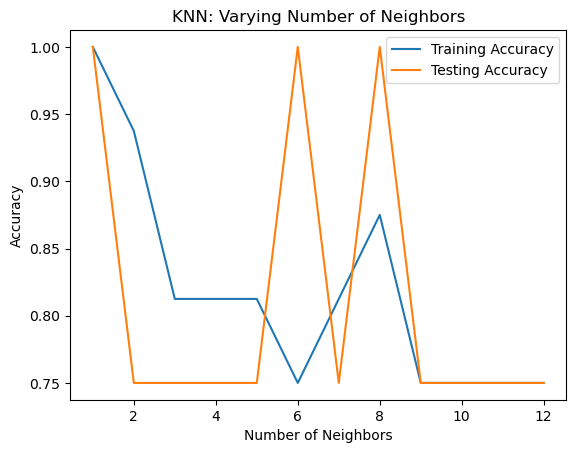

In [199]:
from matplotlib import pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(),label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()